In [1]:
# all includes
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
from tensorflow import keras
from keras.utils import pad_sequences

### Prepare data

In [2]:
# define some hyperparameters
max_features = 10000  # amount of worlds in text considered like features
maxlen = 500  # max amount of worlds in text
batch_size = 32

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 4s 0us/step


In [4]:
# ensure they all have the same length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
x_train.shape
x_test.shape

(25000, 500)

### Build RNN model

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Reducing the risk of overfitting
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-04-27 20:44:30.397596: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 15s 93ms/step - loss: 0.6929 - accuracy: 0.5074 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 2/10
157/157 [==============================] - 15s 93ms/step - loss: 0.6908 - accuracy: 0.5500 - val_loss: 0.6895 - val_accuracy: 0.5584
Epoch 3/10
157/157 [==============================] - 15s 95ms/step - loss: 0.6831 - accuracy: 0.6023 - val_loss: 0.6773 - val_accuracy: 0.5880
Epoch 4/10
157/157 [==============================] - 15s 93ms/step - loss: 0.5925 - accuracy: 0.7014 - val_loss: 0.4697 - val_accuracy: 0.7932
Epoch 5/10
157/157 [==============================] - 15s 93ms/step - loss: 0.4921 - accuracy: 0.7708 - val_loss: 0.5047 - val_accuracy: 0.7638
Epoch 6/10
157/157 [==============================] - 15s 94ms/step - loss: 0.3830 - accuracy: 0.8450 - val_loss: 0.3845 - val_accuracy: 0.8334
Epoch 7/10
157/157 [==============================] - 15s 93ms/step - loss: 0.3150 - accuracy: 0.8693 - val_loss: 0.3783 - val_accuracy: 0.8378
Epo

In [9]:
# find loss and accuracy of the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}' )

782/782 [==============================] - 9s 11ms/step - loss: 0.3497 - accuracy: 0.8546
Test accuracy: 0.8546000123023987
Test loss: 0.3496982157230377


In [10]:
# displaying the summary of the RNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 330,785
Trainable params: 330,785
Non-trainable params: 0
_________________________________________________________________


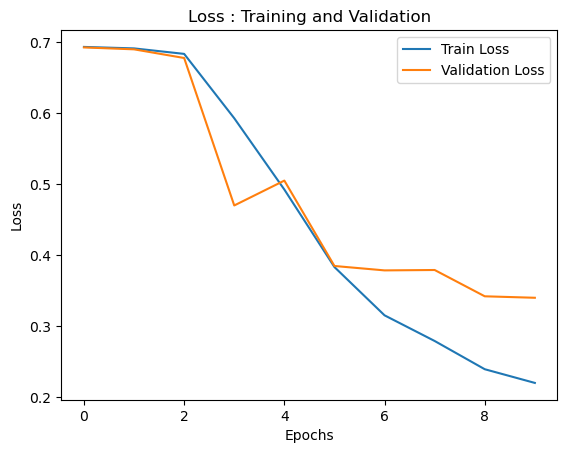

In [11]:
# line graphic for loss
plt.title('Loss : Training and Validation')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

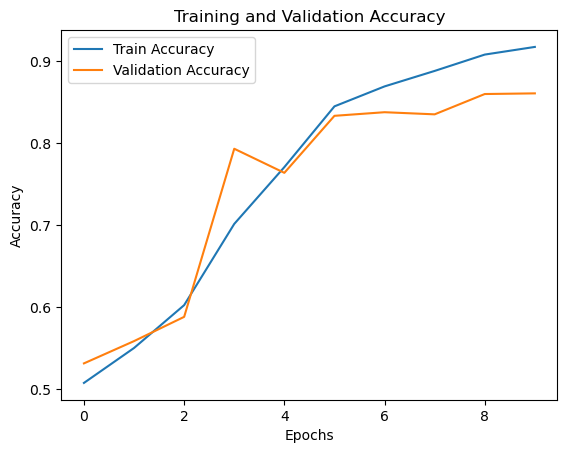

In [12]:
# line graphic for accuracy
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Deep LSTM Mode

In [13]:
# creating a deep LSTM model
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

2024-04-27 21:45:27.086124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 21:45:27.087263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 21:45:27.087879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [14]:
# Compiling the deep LSTM model
model_deep_lstm.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

In [15]:
# training the deep LSTM model
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2024-04-27 21:47:09.957378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 21:47:09.958377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 21:47:09.959281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - ETA: 0s - loss: 0.5417 - acc: 0.6931

2024-04-27 21:52:23.022395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-27 21:52:23.023207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-27 21:52:23.024334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 334s 532ms/step - loss: 0.5417 - acc: 0.6931 - val_loss: 0.3810 - val_acc: 0.8350
Epoch 2/10
625/625 [==============================] - 460s 737ms/step - loss: 0.3112 - acc: 0.8712 - val_loss: 0.3202 - val_acc: 0.8664
Epoch 3/10
625/625 [==============================] - 334s 535ms/step - loss: 0.2494 - acc: 0.9031 - val_loss: 0.3017 - val_acc: 0.8776
Epoch 4/10
625/625 [==============================] - 1166s 2s/step - loss: 0.2043 - acc: 0.9237 - val_loss: 0.2943 - val_acc: 0.8792
Epoch 5/10
625/625 [==============================] - 333s 533ms/step - loss: 0.1784 - acc: 0.9348 - val_loss: 0.3226 - val_acc: 0.8830
Epoch 6/10
625/625 [==============================] - 334s 535ms/step - loss: 0.1571 - acc: 0.9427 - val_loss: 0.3308 - val_acc: 0.8802
Epoch 7/10
625/625 [==============================] - 1311s 2s/step - loss: 0.1412 - acc: 0.9501 - val_loss: 0.3753 - val_acc: 0.8776
Epoch 8/10
625/625 [==============================] - 342s 548m

In [17]:
# find accuracy and loss of the deep LSTM model on test data
test_loss_deep_lstm, test_acc_deep_lstm = model_deep_lstm.evaluate(x_test, y_test)
print(f'Test Accuracy of deep LSTM: {test_acc_deep_lstm}')
print(f'Test Loss of deep LSTM: {test_loss_deep_lstm}')

782/782 [==============================] - 106s 136ms/step - loss: 0.4065 - acc: 0.8552
Test Accuracy of deep LSTM: 0.8551999926567078
Test Loss of deep LSTM: 0.4065380394458771


In [18]:
# displaying the summary of the deep LSTM model
model_deep_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)               

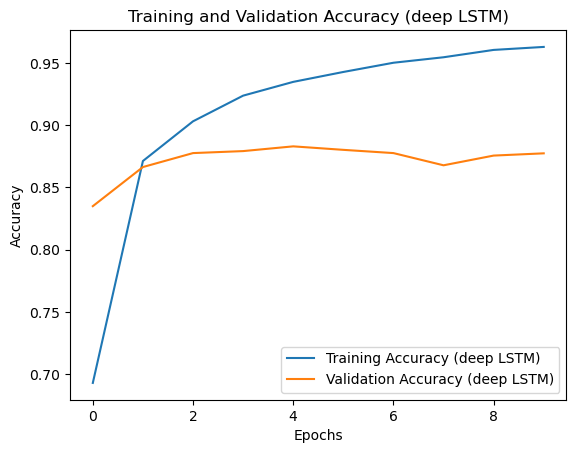

In [19]:
# Line graph of accuracy (deep LSTM)
plt.title('Training and Validation Accuracy (deep LSTM)')
plt.plot(history_deep_lstm.history['acc'], label='Training Accuracy (deep LSTM)')
plt.plot(history_deep_lstm.history['val_acc'], label='Validation Accuracy (deep LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

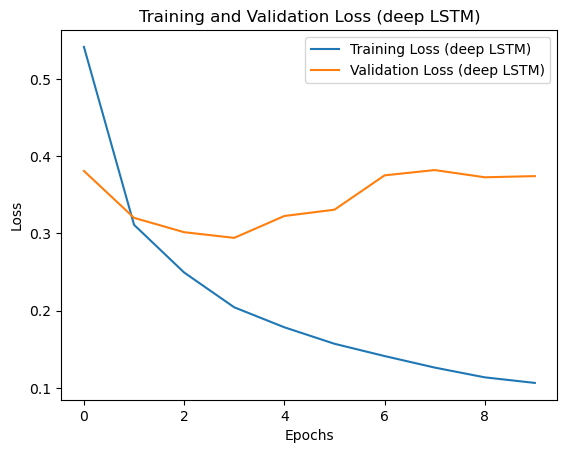

In [20]:
# Line graph of loss (deep LSTM)
plt.title('Training and Validation Loss (deep LSTM)')
plt.plot(history_deep_lstm.history['loss'], label='Training Loss (deep LSTM)')
plt.plot(history_deep_lstm.history['val_loss'], label='Validation Loss (deep LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Bidirectional LSTM Model

In [21]:
# Creating a Bidirectional LSTM model
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(Bidirectional(LSTM(64)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

2024-04-28 00:34:24.986452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 00:34:24.987442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 00:34:24.988549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [22]:
# compiling the Bidirectional LSTM model
model_bidirectional.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

In [24]:
# training the Bidirectional LSTM model
history_bidirectional = model_bidirectional.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 99s 159ms/step - loss: 0.1358 - acc: 0.9532 - val_loss: 0.3417 - val_acc: 0.8844
Epoch 2/10
625/625 [==============================] - 100s 159ms/step - loss: 0.1089 - acc: 0.9657 - val_loss: 0.3385 - val_acc: 0.8862
Epoch 3/10
625/625 [==============================] - 99s 158ms/step - loss: 0.1031 - acc: 0.9672 - val_loss: 0.3227 - val_acc: 0.8852
Epoch 4/10
625/625 [==============================] - 5940s 10s/step - loss: 0.0954 - acc: 0.9692 - val_loss: 0.3427 - val_acc: 0.8850
Epoch 5/10
625/625 [==============================] - 13908s 22s/step - loss: 0.0897 - acc: 0.9718 - val_loss: 0.3692 - val_acc: 0.8826
Epoch 6/10
625/625 [==============================] - 8717s 14s/step - loss: 0.0827 - acc: 0.9737 - val_loss: 0.3590 - val_acc: 0.8706
Epoch 7/10
625/625 [==============================] - 2583s 4s/step - loss: 0.0833 - acc: 0.9728 - val_loss: 0.3402 - val_acc: 0.8814
Epoch 8/10
625/625 [==============================] - 

In [25]:
# Find loss and accuracy of the Bidirectional LSTM model on test data
test_loss_bidirectional, test_acc_bidirectional = model_bidirectional.evaluate(x_test, y_test)
print(f'Bidirectional LSTM Test Accuracy: {test_acc_bidirectional}')
print(f'Bidirectional LSTM Test Loss: {test_loss_bidirectional}')

782/782 [==============================] - 32s 41ms/step - loss: 0.5005 - acc: 0.8599
Bidirectional LSTM Test Accuracy: 0.8599200248718262
Bidirectional LSTM Test Loss: 0.5005342364311218


In [26]:
# displaying the summary of the Bidirectional LSTM model
model_bidirectional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_4 (Dropout)         (None, None, 32)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 369,793
Trainable params: 369,793
Non-trainable params: 0
_________________________________________________________________


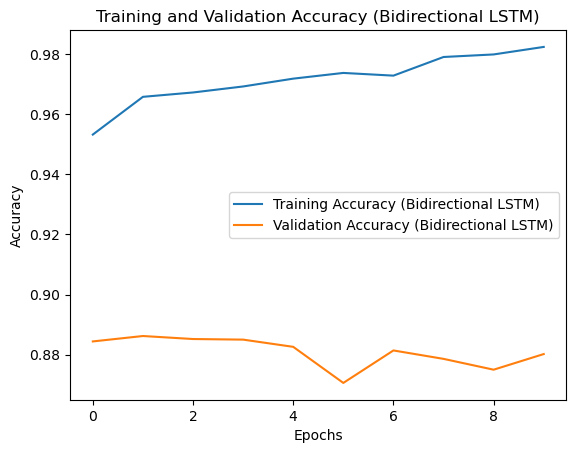

In [27]:
# Line graph of accuracy for Bidirectional LSTM
plt.title('Training and Validation Accuracy (Bidirectional LSTM)')
plt.plot(history_bidirectional.history['acc'], label='Training Accuracy (Bidirectional LSTM)')
plt.plot(history_bidirectional.history['val_acc'], label='Validation Accuracy (Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

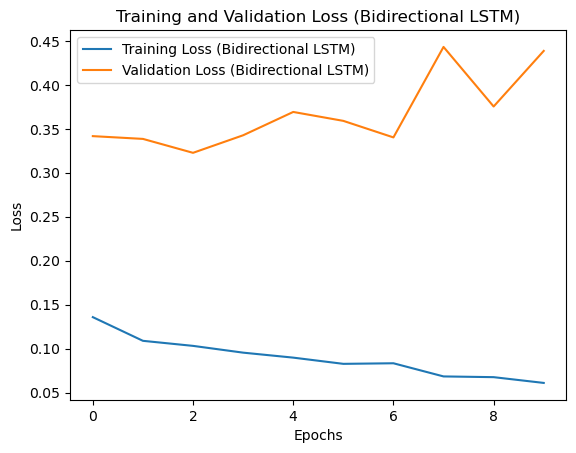

In [28]:
# Line graph of loss for Bidirectional LSTM
plt.title('Training and Validation Loss (Bidirectional LSTM)')
plt.plot(history_bidirectional.history['loss'], label='Training Loss (Bidirectional LSTM)')
plt.plot(history_bidirectional.history['val_loss'], label='Validation Loss (Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM Model

In [29]:
# creating an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

2024-04-28 10:50:46.703295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 10:50:46.704474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 10:50:46.705088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [30]:
# compiling the LSTM model
lstm_model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

In [31]:
# Training the LSTM model 
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-04-28 10:50:52.946837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 10:50:52.948058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 10:50:52.948861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

157/157 [==============================] - ETA: 0s - loss: 0.6919 - acc: 0.5666

2024-04-28 10:51:29.905426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-28 10:51:29.906273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-28 10:51:29.907095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

157/157 [==============================] - 40s 245ms/step - loss: 0.6919 - acc: 0.5666 - val_loss: 0.6898 - val_acc: 0.6206
Epoch 2/10
157/157 [==============================] - 37s 235ms/step - loss: 0.6312 - acc: 0.7136 - val_loss: 0.5735 - val_acc: 0.7860
Epoch 3/10
157/157 [==============================] - 37s 233ms/step - loss: 0.5219 - acc: 0.8133 - val_loss: 0.4913 - val_acc: 0.8242
Epoch 4/10
157/157 [==============================] - 36s 232ms/step - loss: 0.4346 - acc: 0.8480 - val_loss: 0.4098 - val_acc: 0.8580
Epoch 5/10
157/157 [==============================] - 36s 232ms/step - loss: 0.3602 - acc: 0.8770 - val_loss: 0.3708 - val_acc: 0.8710
Epoch 6/10
157/157 [==============================] - 36s 232ms/step - loss: 0.3211 - acc: 0.8950 - val_loss: 0.3572 - val_acc: 0.8694
Epoch 7/10
157/157 [==============================] - 37s 237ms/step - loss: 0.2895 - acc: 0.9046 - val_loss: 0.3361 - val_acc: 0.8790
Epoch 8/10
157/157 [==============================] - 40s 253ms/st

In [32]:
# Find loss, accuracy of the LSTM model on test data
test_loss, test_acc = lstm_model.evaluate(x_test, y_test)
print(f'Test Accuracy (LSTM): {test_acc}')
print(f'Test Loss (LSTM): {test_loss}')

782/782 [==============================] - 19s 24ms/step - loss: 0.3528 - acc: 0.8677
Test Accuracy (LSTM): 0.867680013179779
Test Loss (LSTM): 0.35277149081230164


In [33]:
# summary of the LSTM model
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


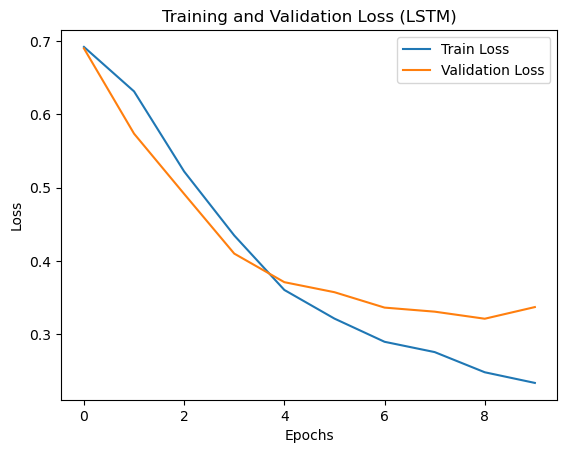

In [34]:
# Line graph of loss for LSTM
plt.title('Training and Validation Loss (LSTM)')
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

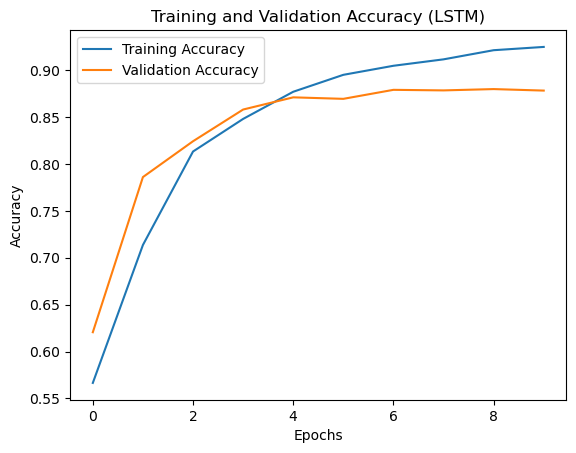

In [35]:
# Line graph of accuracy for LSTM
plt.title('Training and Validation Accuracy (LSTM)')
plt.plot(lstm_history.history['acc'], label='Training Accuracy')
plt.plot(lstm_history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Conclusion

In this task was created 4 model (RNN, LSTM, Bidirectional LSTM, Deep LSTM)—and evaluating their performance. Here are the results and recommendations for each model:

**Simple RNN Model:**
* Test Accuracy: 0.8546000123023987
* Test loss: 0.3496982157230377
* Architecture: Embedding -> SimpleRNN -> Dense
* Recommendations: Find better hyperparameters for improved accuracy.

**Deep LSTM Model:**
* Test Accuracy of deep LSTM: 0.8551999926567078
* Test Loss of deep LSTM: 0.4065380394458771
* Architecture: Embedding -> LSTM (x3) -> Dense
* Recommendations: Improve time compilation, managing network depth.

**Bidirectional LSTM Model:**
* Test Accuracy: 0.8599200248718262
* Test Loss: 0.5005342364311218
* Architecture: Embedding -> Bidirectional LSTM -> Dense
* Recommendations: Improve time compilation and find better hyperparameters.

**LSTM Model:**
* Test Accuracy (LSTM): 0.867680013179779
* Test Loss (LSTM): 0.35277149081230164
* Architecture: Embedding -> LSTM -> Dense
* Recommendations: Find better hyperparameters for better performance.

Each model exhibits its own strengths and weaknesses, and there is room for improvement in all of them. Better hyperparameter tuning, optimization of compilation time, and refining of network architecture can lead to improved performance across the board.